# Data Exploration & Cleaning 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [4]:
df = pd.read_csv("TRADES_CopyTr_90D_ROI.csv")


In [6]:
df.head(4)

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Port_IDs       150 non-null    int64 
 1   Trade_History  149 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [10]:
df.describe()

,Port_IDs
count,1.500000e+02
mean,3.975655e+18
std,6.887470e+16
min,3.672755e+18
25%,3.943672e+18
50%,3.998616e+18
75%,4.029508e+18
max,4.041860e+18


In [12]:
df.dropna(subset=["Trade_History"], inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Port_IDs       149 non-null    int64 
 1   Trade_History  149 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [18]:
df["Trade_History"] = df["Trade_History"].apply(ast.literal_eval)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Port_IDs       149 non-null    int64 
 1   Trade_History  149 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [23]:
df.head(4)

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."


### Expand trade history into a structured DataFrame.

In [27]:
trade_records = []
for _, row in df.iterrows():
    port_id = row["Port_IDs"]
    for trade in row["Trade_History"]:
        trade["Port_IDs"] = port_id  
        trade_records.append(trade)

trade_df = pd.DataFrame(trade_records)

In [29]:
trade_df.head(4)

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_IDs
0,1718899656000,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504
1,1718899618000,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504
2,1718899618000,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504
3,1718899616000,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504


In [31]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211277 entries, 0 to 211276
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 211277 non-null  int64  
 1   symbol               211277 non-null  object 
 2   side                 211277 non-null  object 
 3   price                211277 non-null  float64
 4   fee                  211277 non-null  float64
 5   feeAsset             211277 non-null  object 
 6   quantity             211277 non-null  float64
 7   quantityAsset        211277 non-null  object 
 8   realizedProfit       211277 non-null  float64
 9   realizedProfitAsset  211277 non-null  object 
 10  baseAsset            211277 non-null  object 
 11  qty                  211277 non-null  float64
 12  positionSide         211277 non-null  object 
 13  activeBuy            211277 non-null  bool   
 14  Port_IDs             211277 non-null  int64  
dtypes: bool(1), float

In [33]:
if "time" in trade_df.columns:
    trade_df["time"] = pd.to_datetime(trade_df["time"], unit='ms')

In [35]:
trade_df.head(4)

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_IDs
0,2024-06-20 16:07:36,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504
1,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504
2,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504
3,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504


In [37]:
columns_to_extract = ["time", "symbol", "side", "price", "fee", "feeAsset", "quantity", "quantityAsset", "realizedProfit", "realizedProfitAsset"]
for col in columns_to_extract:
    if col not in trade_df.columns:
        trade_df[col] = None

In [39]:
trade_df

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_IDs
0,2024-06-20 16:07:36,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504
1,2024-06-20 16:06:58,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504
2,2024-06-20 16:06:58,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504
3,2024-06-20 16:06:56,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504
4,2024-06-20 16:06:56,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True,3925368433214965504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211272,2024-06-16 14:57:55,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False,3768170840939476993
211273,2024-06-16 14:57:55,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False,3768170840939476993
211274,2024-06-16 14:57:55,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False,3768170840939476993
211275,2024-06-16 14:57:55,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False,3768170840939476993


In [41]:
trade_df.columns

Index(['time', 'symbol', 'side', 'price', 'fee', 'feeAsset', 'quantity',
       'quantityAsset', 'realizedProfit', 'realizedProfitAsset', 'baseAsset',
       'qty', 'positionSide', 'activeBuy', 'Port_IDs'],
      dtype='object')

#### Identify profit column.

In [57]:
detected_profit_col = None
for col in ['realizedProfit', 'profit', 'PnL', 'netProfit']:
    if col in trade_df.columns:
        detected_profit_col = col
        break

if detected_profit_col is None:
    raise KeyError("No suitable profit column found in dataset.")

print(f"Detected profit column: {detected_profit_col}")


Detected profit column: realizedProfit


In [45]:
trade_df.columns

Index(['time', 'symbol', 'side', 'price', 'fee', 'feeAsset', 'quantity',
       'quantityAsset', 'realizedProfit', 'realizedProfitAsset', 'baseAsset',
       'qty', 'positionSide', 'activeBuy', 'Port_IDs'],
      dtype='object')

In [59]:
trade_df['win'] = trade_df[detected_profit_col] > 0

In [61]:
print(trade_df[['Port_IDs', detected_profit_col, 'win']].head(10))


              Port_IDs  realizedProfit    win
0  3925368433214965504             0.0  False
1  3925368433214965504             0.0  False
2  3925368433214965504             0.0  False
3  3925368433214965504             0.0  False
4  3925368433214965504             0.0  False
5  3925368433214965504             0.0  False
6  3925368433214965504             0.0  False
7  3925368433214965504             0.0  False
8  3925368433214965504             0.0  False
9  3925368433214965504             0.0  False


In [78]:
trade_df.shape


(211277, 16)

#### Calculate metrics.

In [86]:
def calculate_metrics(trade_df):
    results = []
    risk_free_rate = 0  

    if detected_profit_col is None:
        raise KeyError("Profit column not found!")

    if trade_df.empty:
        print("Warning: trade_df is empty!")
        return pd.DataFrame()  

    for account, group in trade_df.groupby("Port_IDs"):
        total_pnl = group[detected_profit_col].sum()
        
        if 'quantity' in group.columns and not group['quantity'].isnull().all():
            initial_balance = group.iloc[0]['quantity'] if group.iloc[0]['quantity'] != 0 else 1
        else:
            initial_balance = 1

        roi = (total_pnl / initial_balance) * 100
        win_positions = group['win'].sum()
        total_positions = len(group)
        win_rate = (win_positions / total_positions) * 100 if total_positions > 0 else 0

        results.append([account, roi, total_pnl, win_rate, win_positions, total_positions])

    return pd.DataFrame(results, columns=["Port_IDs", "ROI", "PnL", "Win Rate", "Win Positions", "Total Positions"])

metrics_df = calculate_metrics(trade_df)
print(metrics_df.head())  


              Port_IDs          ROI          PnL   Win Rate  Win Positions  \
0  3672754654734989568   603.174140   566.597660  44.303797            210   
1  3733192481840423936     9.885722  2923.977200  80.261248            553   
2  3768170840939476993    24.399009   243.668899  42.857143              6   
3  3784403294629753856  1307.463306  2521.814305  30.231405           1829   
4  3786761687746711808    26.283582   205.021400  45.121951             37   

   Total Positions  
0              474  
1              689  
2               14  
3             6050  
4               82  


## Sharpe Ratio Calculation.

In [100]:
def calculate_metrics(trade_df):
    results = []
    risk_free_rate = 0 

    for account, group in trade_df.groupby("Port_IDs"):
        total_pnl = group[detected_profit_col].sum()
        initial_balance = group.iloc[0]['quantity'] if 'quantity' in group.columns and group.iloc[0]['quantity'] != 0 else 1
        roi = (total_pnl / initial_balance) * 100
        win_positions = group['win'].sum()
        total_positions = len(group)
        win_rate = (win_positions / total_positions) * 100 if total_positions > 0 else 0

        if len(group) > 1 and detected_profit_col in group.columns:
            daily_returns = group[detected_profit_col].pct_change().dropna()
            sharpe_ratio = (daily_returns.mean() - risk_free_rate) / daily_returns.std() if not daily_returns.empty and daily_returns.std() != 0 else 0
        else:
            sharpe_ratio = 0  
        if len(group) > 1 and detected_profit_col in group.columns:
            cumulative_returns = (1 + daily_returns).cumprod() if not daily_returns.empty else pd.Series([1])
            peak = cumulative_returns.cummax()
            drawdown = (cumulative_returns - peak) / peak
            max_drawdown = drawdown.min()
        else:
            max_drawdown = 0  
        results.append([account, roi, total_pnl, sharpe_ratio, max_drawdown, win_rate, win_positions, total_positions])

    return pd.DataFrame(results, columns=["Port_IDs", "ROI", "PnL", "Sharpe Ratio", "MDD", "Win Rate", "Win Positions", "Total Positions"])


metrics_df = calculate_metrics(trade_df)
print(metrics_df.head())  


C:\Users\aman0\anaconda_distribution\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\aman0\anaconda_distribution\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


              Port_IDs          ROI          PnL  Sharpe Ratio  MDD  \
0  3672754654734989568   603.174140   566.597660           NaN -1.0   
1  3733192481840423936     9.885722  2923.977200           NaN  NaN   
2  3768170840939476993    24.399009   243.668899           NaN  NaN   
3  3784403294629753856  1307.463306  2521.814305           NaN -1.0   
4  3786761687746711808    26.283582   205.021400           NaN  NaN   

    Win Rate  Win Positions  Total Positions  
0  44.303797            210              474  
1  80.261248            553              689  
2  42.857143              6               14  
3  30.231405           1829             6050  
4  45.121951             37               82  


C:\Users\aman0\anaconda_distribution\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
C:\Users\aman0\anaconda_distribution\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


##  Maximum Drawdown Calculation.

In [105]:
def calculate_metrics(trade_df):
    results = [[acc, (g[detected_profit_col].sum() / (g.iloc[0].get('quantity', 1) or 1)) * 100, g[detected_profit_col].sum(), 
                (r.mean() / r.std()) if (len(r := g[detected_profit_col].pct_change().dropna()) > 1 and r.std() != 0) else 0, 
                ((1 + r).cumprod().sub((1 + r).cumprod().cummax()).div((1 + r).cumprod().cummax())).min() if len(r) > 1 else 0, 
                (w := g['win'].sum()) / len(g) * 100 if len(g) > 0 else 0, w, len(g)] 
               for acc, g in trade_df.groupby("Port_IDs")]
    return pd.DataFrame(results, columns=["Port_IDs", "ROI", "PnL", "Sharpe Ratio", "MDD", "Win Rate", "Win Positions", "Total Positions"])

metrics_df = calculate_metrics(trade_df)
print(metrics_df.head())


C:\Users\aman0\anaconda_distribution\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\aman0\anaconda_distribution\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


              Port_IDs          ROI          PnL  Sharpe Ratio  MDD  \
0  3672754654734989568   603.174140   566.597660           NaN -1.0   
1  3733192481840423936     9.885722  2923.977200           NaN  NaN   
2  3768170840939476993    24.399009   243.668899           NaN  NaN   
3  3784403294629753856  1307.463306  2521.814305           NaN -1.0   
4  3786761687746711808    26.283582   205.021400           NaN  NaN   

    Win Rate  Win Positions  Total Positions  
0  44.303797            210              474  
1  80.261248            553              689  
2  42.857143              6               14  
3  30.231405           1829             6050  
4  45.121951             37               82  


## Ranking Algorithm.

In [126]:
weights = {"ROI": 0.3, "PnL": 0.2, "Sharpe Ratio": 0.2, "MDD": -0.1, "Win Rate": 0.2}
for col, weight in weights.items():
    metrics_df[col] = (metrics_df[col] - metrics_df[col].min()) / (metrics_df[col].max() - metrics_df[col].min())
    metrics_df[col] *= weight

metrics_df["Score"] = metrics_df[list(weights.keys())].sum(axis=1)
metrics_df.sort_values(by="Score", ascending=False, inplace=True)
print(metrics_df.sort_values(by="Score", ascending=False).head())



                Port_IDs       ROI       PnL  Sharpe Ratio       MDD  \
69   3993222640082269952  0.252693  0.033745           NaN -0.008952   
101  4023616625178799873  0.237715  0.034227           NaN       NaN   
121  4031181049693676544  0.300000  0.040054           NaN -0.041746   
99   4022565861939831809  0.137808  0.062942           NaN       NaN   
27   3931992636670880512  0.162707  0.053878           NaN       NaN   

     Win Rate  Win Positions  Total Positions     Score  
69   0.115754           1434             3087  0.393240  
101  0.102145            339              827  0.374087  
121  0.060234             73              302  0.358542  
99   0.131486            372              705  0.332236  
27   0.100086           2430             6050  0.316671  


In [132]:
trade_df.columns

Index(['time', 'symbol', 'side', 'price', 'fee', 'feeAsset', 'quantity',
       'quantityAsset', 'realizedProfit', 'realizedProfitAsset', 'baseAsset',
       'qty', 'positionSide', 'activeBuy', 'Port_IDs', 'win'],
      dtype='object')

In [140]:
top_20 = metrics_df.head(20)
print(top_20)

                Port_IDs       ROI       PnL  Sharpe Ratio       MDD  \
69   3993222640082269952  0.252693  0.033745           NaN -0.008952   
101  4023616625178799873  0.237715  0.034227           NaN       NaN   
121  4031181049693676544  0.300000  0.040054           NaN -0.041746   
99   4022565861939831809  0.137808  0.062942           NaN       NaN   
27   3931992636670880512  0.162707  0.053878           NaN       NaN   
72   3996598927198996481  0.196038  0.037597           NaN -0.008952   
14   3886752488982104320  0.086255  0.046338           NaN -0.008952   
96   4020204877254599680  0.006623  0.200000           NaN -0.009294   
62   3986814617275053313  0.011550  0.068016           NaN       NaN   
16   3891020560590657281  0.083789  0.036049           NaN -0.008952   
75   3999240873283311617  0.010631  0.130229           NaN -0.008952   
37   3944088772635000577  0.089628  0.047254           NaN       NaN   
1    3733192481840423936  0.005854  0.036210           NaN      

In [144]:
metrics_df.to_csv("calculated_metrics.csv", index=False)
top_20.to_csv("top_20_accounts.csv", index=False)

## Plotting graph of Top 20 Accounts.

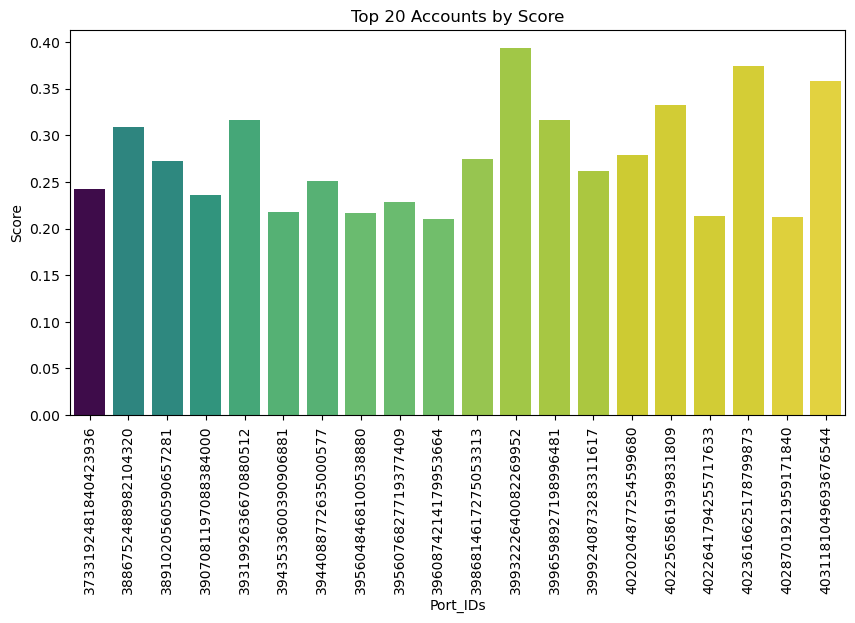

In [146]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_20, x="Port_IDs", y="Score", palette="viridis", hue="Port_IDs", dodge=False)
plt.xticks(rotation=90)
plt.title("Top 20 Accounts by Score")
plt.legend([],[], frameon=False)
plt.show()


## Generate Report.

In [154]:
report = """
### Binance Trade Analysis Report

#### Data Overview
- Number of Accounts: {}
- Number of Trades: {}

#### Key Metrics Computed
- ROI (Return on Investment)
- PnL (Profit and Loss)
- Sharpe Ratio (Risk-adjusted return measure)
- Maximum Drawdown (MDD - Risk assessment metric)
- Win Rate (Percentage of profitable trades)
- Win Positions & Total Positions

#### Ranking Methodology
A weighted ranking system was used:
- ROI: 30%
- PnL: 20%
- Sharpe Ratio: 20%
- MDD: -10% (negative weight as it's a risk metric)
- Win Rate: 20%

#### Findings
- The top 20 performing accounts based on ranking are saved in `top_20_accounts.csv`.
- The full calculated metrics are saved in `calculated_metrics.csv`.
- Additional visualizations provide insights into ROI and Sharpe Ratio distributions.

#### Conclusion
This analysis provides a comprehensive ranking of Binance trading accounts based on multiple financial performance metrics.
""".format(len(metrics_df), len(trade_df))

with open("trade_analysis_report.txt", "w") as f:
    f.write(report)

In [156]:
print("Report saved as trade_analysis_report.txt")

Report saved as trade_analysis_report.txt
